[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Shape: (73996, 5)
Sample:
       label                     clean_text
0  Positive  im getting borderlands murder
1  Positive            coming borders kill
2  Positive    im getting borderlands kill
3  Positive   im coming borderlands murder
4  Positive  im getting borderlands murder


<ipython-input-5-e210292e377d>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='coolwarm')


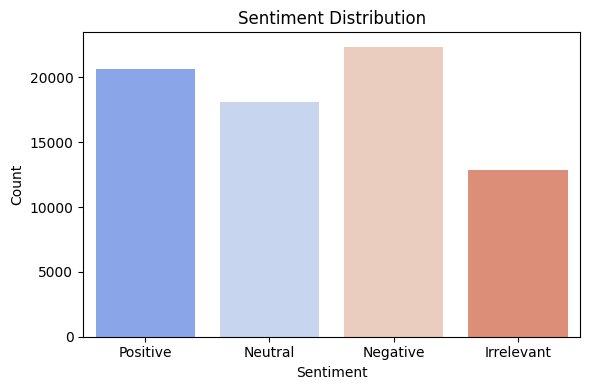

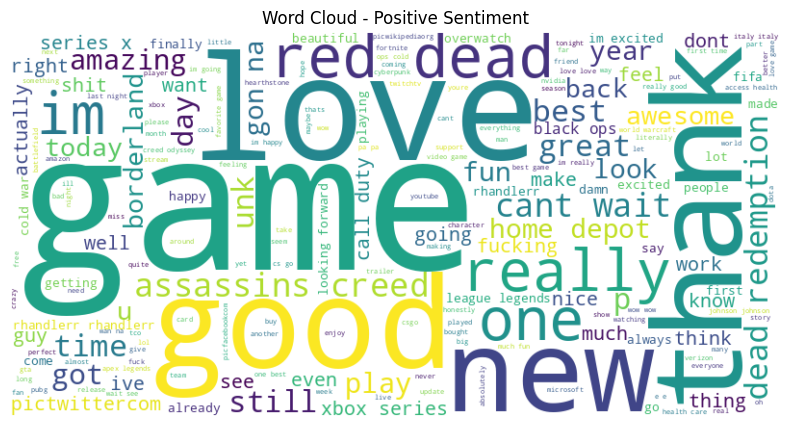

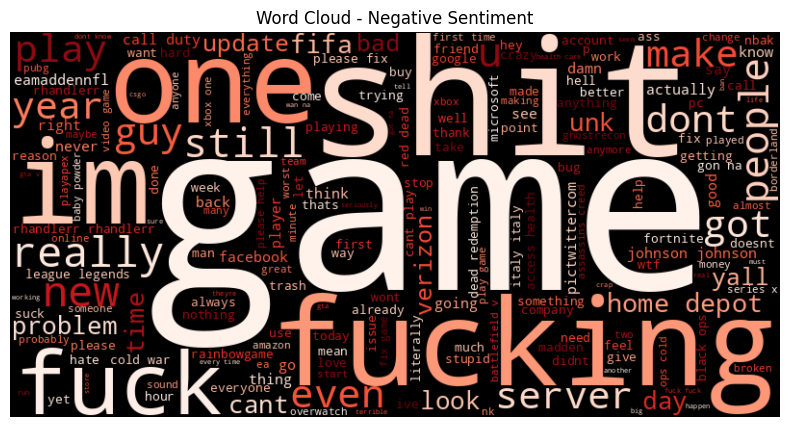

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources (only needed once)
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/twitter_training.csv', header=None, names=['id', 'entity', 'label', 'text'])

# Drop rows with missing text
df = df.dropna(subset=['text'])

# Clean text function with error handling
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove links
    text = re.sub(r'\@\w+|\#\w+', '', text)              # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)             # Remove special characters
    tokens = word_tokenize(text.lower())                # Tokenize and lowercase
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(tokens)

# Apply cleaning function
df['clean_text'] = df['text'].apply(clean_text)

# Show dataset shape and sample
print("Shape:", df.shape)
print("Sample:\n", df[['label', 'clean_text']].head())

# Plot sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label', palette='coolwarm')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Generate word cloud for Positive sentiment
positive_text = " ".join(df[df['label'] == 'Positive']['clean_text'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Sentiment")
plt.show()

# Generate word cloud for Negative sentiment
negative_text = " ".join(df[df['label'] == 'Negative']['clean_text'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Sentiment")
plt.show()
